# Clustering

See our notes on [unsupervised learning](https://jennselby.github.io/MachineLearningCourseNotes/#unsupervised-learning), [K-means](https://jennselby.github.io/MachineLearningCourseNotes/#k-means-clustering), [DBSCAN](https://jennselby.github.io/MachineLearningCourseNotes/#dbscan-clustering), and [clustering validation](https://jennselby.github.io/MachineLearningCourseNotes/#clustering-validation).

For documentation of various clustering methods in scikit-learn, see http://scikit-learn.org/stable/modules/clustering.html

The code was based on the example at http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html
which has the following comments:

Code source: Gaël Varoquaux<br/>
Modified for documentation by Jaques Grobler<br/>
License: BSD 3 clause

In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets
from sklearn import metrics
import sklearn

import pandas

## Iris Dataset

Before you go on, if you haven't used the iris dataset in a previous assignment, make sure you understand it. Modify the cell below to examine different parts of the dataset that are contained in the iris dictionary object.

What are the features? What are we trying to classify?

In [2]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
iris_df = pandas.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Visualization Setup

In [4]:
# We can only plot 3 of the 4 iris features, since we only see in 3D.
# These are the ones the example code picked
X_FEATURE = 'petal width (cm)' 
Y_FEATURE = 'sepal length (cm)' 
Z_FEATURE = 'petal length (cm)'

# set some bounds for the figures that will display the plots of clusterings with various
# hyperparameter settings
# this allows for NUM_COLS * NUM_ROWS plots in the figure
NUM_COLS = 4
NUM_ROWS = 6
FIG_WIDTH = 4 * NUM_COLS
FIG_HEIGHT = 3 * NUM_ROWS

def add_plot(figure, subplot_num, subplot_name, data, labels):
    '''Create a new subplot in the figure.'''

    # create a new subplot
    axis = figure.add_subplot(NUM_ROWS, NUM_COLS, subplot_num, projection='3d',
                              elev=48, azim=134)

    # Plot three of the four features on the graph, and set the color according to the labels
    axis.scatter(data[X_FEATURE], data[Y_FEATURE], data[Z_FEATURE], c=labels)

    # get rid of the tick numbers. Otherwise, they all overlap and it looks horrible
    for axis_obj in [axis.w_xaxis, axis.w_yaxis, axis.w_zaxis]:
        axis_obj.set_ticklabels([])

    # label the subplot
    axis.title.set_text(subplot_name)

## Visualization

This is the correct labeling, based on the targets.

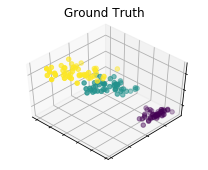

In [5]:
# start a new figure to hold all of the subplots
truth_figure = matplotlib.pyplot.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))

# Plot the ground truth
add_plot(truth_figure, 1, "Ground Truth", iris_df, iris.target)

## Training and Visualization

Now let's see how k-means clusters the iris dataset, with various different numbers of clusters

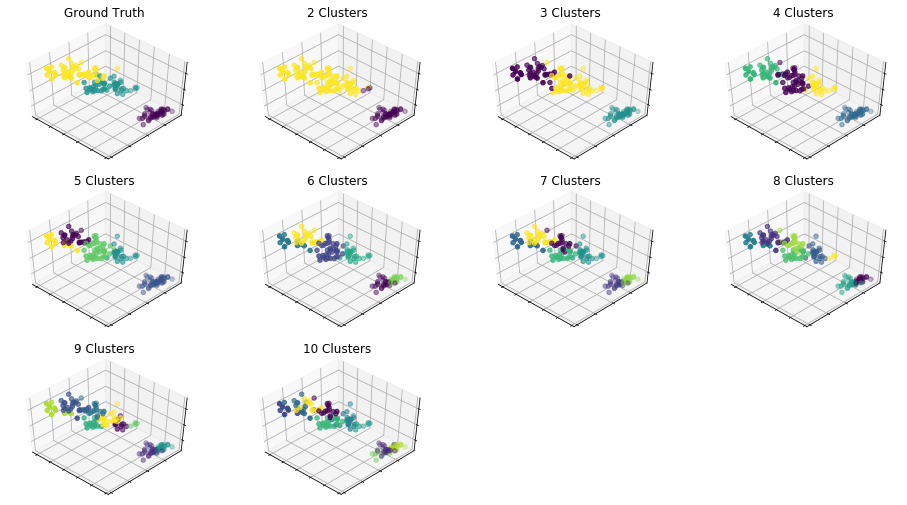

In [6]:
MAX_CLUSTERS = 10
# start a new figure to hold all of the subplots
kmeans_figure = matplotlib.pyplot.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))

# Plot the ground truth
add_plot(kmeans_figure, 1, "Ground Truth", iris_df, iris.target)

plot_num = 2
for num_clusters in range(2, MAX_CLUSTERS + 1):
    # train the model
    model = KMeans(n_clusters=num_clusters)
    model.fit(iris_df)
    
    # get the predictions of which cluster each input is in
    labels = model.labels_

    # plot this clustering
    title = '{} Clusters'.format(num_clusters) 
    add_plot(kmeans_figure, plot_num, title, iris_df, labels.astype(numpy.float))
    plot_num += 1

# Exercise

1. Add [validation](https://jennselby.github.io/MachineLearningCourseNotes/#clustering-validation) to measure how good the clustering is, with different numbers of clusters.
1. Run the iris data through DBSCAN or hierarchical clustering and validate that as well.
1. Comment on the validation results, explaining which models did best and why you think that might be.

In [7]:
# 1. K-means model and validation

km_model = KMeans(n_clusters=3)
km_model.fit(iris_df)

# get the predictions of which cluster each input is in
km_labels = km_model.labels_

print("K-means silhouette score:", metrics.silhouette_score(iris_df, km_labels))
print("K-means adjusted Rand score:", metrics.adjusted_rand_score(iris.target, km_labels))
print("K-means Fowlkes-Mallows score:", metrics.fowlkes_mallows_score(iris.target, km_labels), "\n")

# 2. DBSCAN model and validation

db_model = DBSCAN(eps=0.5, min_samples=4)
db_model.fit(iris_df)

# get the predictions of which cluster each input is in
db_labels = db_model.labels_

print("DBSCAN silhouette score:", metrics.silhouette_score(iris_df, db_labels))
print("DBSCAN adjusted Rand score:", metrics.adjusted_rand_score(iris.target, db_labels))
print("DBSCAN Fowlkes-Mallows score:", metrics.fowlkes_mallows_score(iris.target, db_labels), "\n")

# 3. Hierarchical clustering model and validation

ac_model = AgglomerativeClustering(n_clusters=3)
ac_model.fit(iris_df)

# get the predictions of which cluster each input is in
ac_labels = km_model.labels_

print("Agglomerative silhouette score:", metrics.silhouette_score(iris_df, ac_labels))
print("Agglomerative adjusted Rand score:", metrics.adjusted_rand_score(iris.target, ac_labels))
print("Agglomerative Fowlkes-Mallows score:", metrics.fowlkes_mallows_score(iris.target, ac_labels), "\n")

K-means silhouette score: 0.5528190123564091
K-means adjusted Rand score: 0.7302382722834697
K-means Fowlkes-Mallows score: 0.8208080729114153 

DBSCAN silhouette score: 0.38124539908253136
DBSCAN adjusted Rand score: 0.5258016187512744
DBSCAN Fowlkes-Mallows score: 0.7073232802503385 

Agglomerative silhouette score: 0.5528190123564091
Agglomerative adjusted Rand score: 0.7302382722834697
Agglomerative Fowlkes-Mallows score: 0.8208080729114153 



The K-means and agglomerative clustering algorithms do well in the validation metrics because they inherently know how many clusters there are beforehand and try to find the best divisions/centroids such that 3 separate clusters are formed. 

This also explains why DBSCAN does so poorly—because two of the cluster classes are extremely close to each other and even overlap a bit, DBSCAN has a hard time determining the boundary between the clusters. If DBSCAN's $\epsilon$ value is too large, it will classify the upper-left set of points as a single cluster, and if DBSCAN's $\epsilon$ value is too small, it will place the set into several different clusters. In other words, it cannot attain a middle ground for $\epsilon$ and $N$ because the clusters are overlapping.